In [46]:
import pandas as pd
import matplotlib.pylab as plt
import seaborn as sns
import numpy as np
pd.set_option('display.max_columns', None)
pd.set_option('display.width', 1000)

In [47]:
from sklearn.datasets import load_iris

iris = load_iris()

data = pd.DataFrame(iris.data, columns=iris.feature_names)

# Add target column
data['target'] = iris.target

data.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [48]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

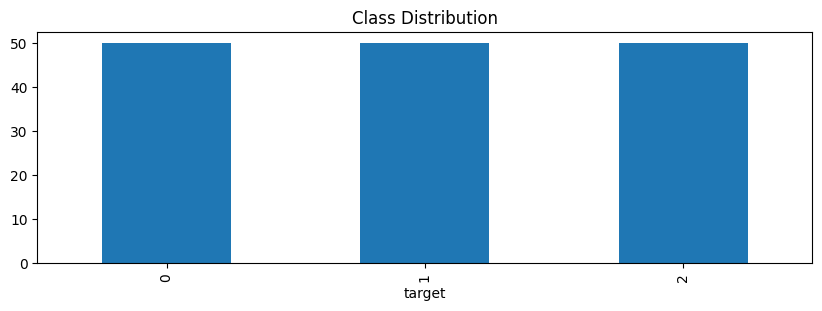

target
0    50
1    50
2    50
Name: count, dtype: int64

In [49]:
data['target'].value_counts().plot(kind="bar", figsize=(10,3))
plt.title("Class Distribution")
plt.show()
data['target'].value_counts()

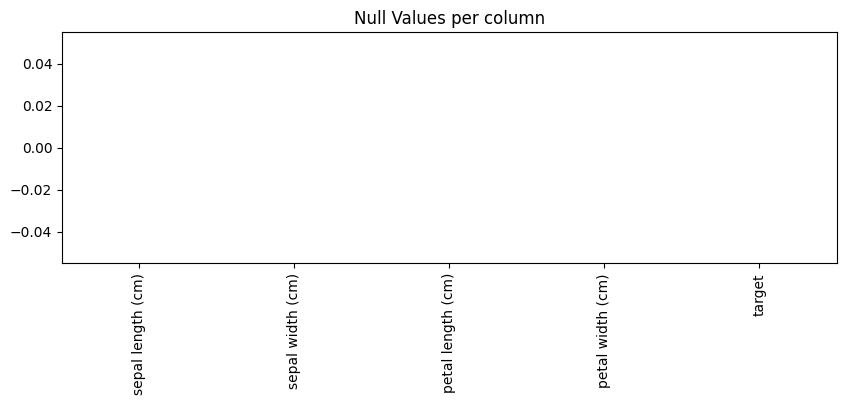

sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
target               0
dtype: int64

In [50]:
data.isnull().sum().plot(kind="bar", figsize=(10,3))
plt.title("Null Values per column")
plt.show()

data.isnull().sum()

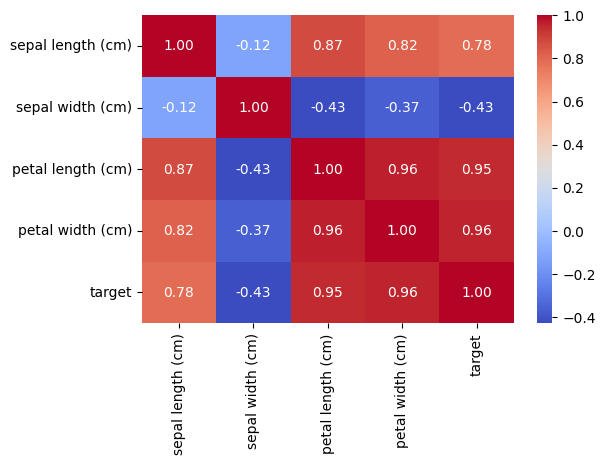

In [51]:
corr_matrix = data.corr()

plt.figure(figsize=(6,4))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm")
plt.show()


In [52]:
setosa = data[data["target"] == 0]
versicolor = data[data["target"] == 1]
virginica = data[data["target"] == 2]

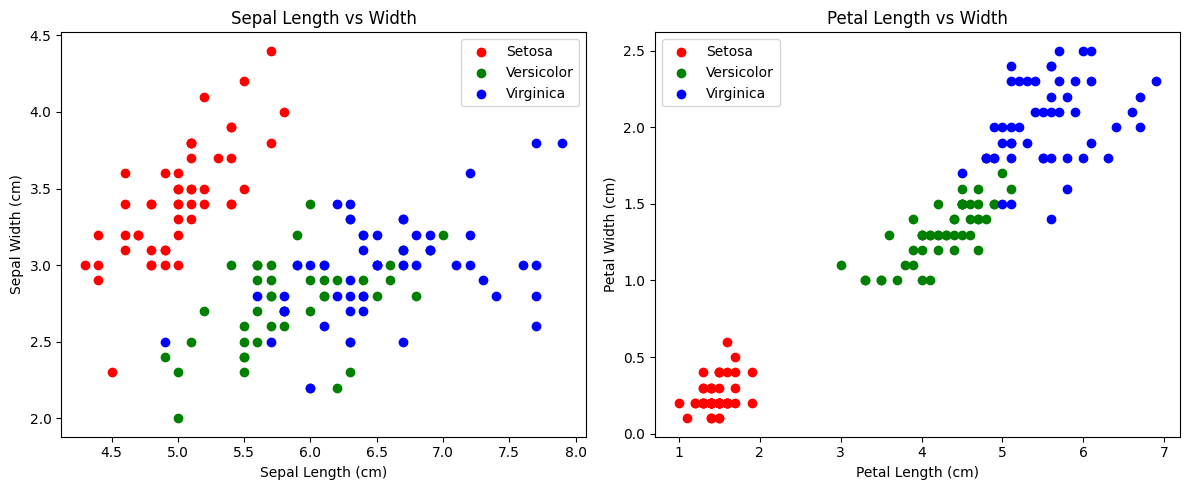

In [53]:
plt.figure(figsize=(12,5))

# Sepal plot
plt.subplot(1, 2, 1)
plt.scatter(setosa["sepal length (cm)"], setosa["sepal width (cm)"], color="red", label="Setosa")
plt.scatter(versicolor["sepal length (cm)"], versicolor["sepal width (cm)"], color="green", label="Versicolor")
plt.scatter(virginica["sepal length (cm)"], virginica["sepal width (cm)"], color="blue", label="Virginica")
plt.xlabel("Sepal Length (cm)")
plt.ylabel("Sepal Width (cm)")
plt.title("Sepal Length vs Width")
plt.legend()

# Petal plot
plt.subplot(1, 2, 2)
plt.scatter(setosa["petal length (cm)"], setosa["petal width (cm)"], color="red", label="Setosa")
plt.scatter(versicolor["petal length (cm)"], versicolor["petal width (cm)"], color="green", label="Versicolor")
plt.scatter(virginica["petal length (cm)"], virginica["petal width (cm)"], color="blue", label="Virginica")
plt.xlabel("Petal Length (cm)")
plt.ylabel("Petal Width (cm)")
plt.title("Petal Length vs Width")
plt.legend()

plt.tight_layout()
plt.show()


In [54]:
from sklearn.model_selection import train_test_split, ParameterGrid

X = iris.data
y= iris.target


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y,)

In [55]:
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import  MinMaxScaler
from sklearn.metrics import balanced_accuracy_score, f1_score, classification_report, accuracy_score


model_class = SVC   # <--- just swap this to another sklearn model class
param_grid = {
    "C": [0.1, 1, 10],
    "kernel": ["linear", "poly", "rbf", "sigmoid"],
    "gamma": ["scale", "auto"]
}
# ===========================================

best_accuracy = 0.0
best_params = None

# Loop over all param combinations dynamically
for params in ParameterGrid(param_grid):
    model = model_class(**params)   # create model with given params
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)

    print(f"Params={params} --> Accuracy={acc:.4f}")

    if acc > best_accuracy:
        best_accuracy = acc
        best_params = params

print("\nBest Model:")
print(f"Params={best_params} --> Accuracy={best_accuracy:.4f}")



Params={'C': 0.1, 'gamma': 'scale', 'kernel': 'linear'} --> Accuracy=0.9667
Params={'C': 0.1, 'gamma': 'scale', 'kernel': 'poly'} --> Accuracy=1.0000
Params={'C': 0.1, 'gamma': 'scale', 'kernel': 'rbf'} --> Accuracy=0.9000
Params={'C': 0.1, 'gamma': 'scale', 'kernel': 'sigmoid'} --> Accuracy=0.1000
Params={'C': 0.1, 'gamma': 'auto', 'kernel': 'linear'} --> Accuracy=0.9667
Params={'C': 0.1, 'gamma': 'auto', 'kernel': 'poly'} --> Accuracy=1.0000
Params={'C': 0.1, 'gamma': 'auto', 'kernel': 'rbf'} --> Accuracy=0.9000
Params={'C': 0.1, 'gamma': 'auto', 'kernel': 'sigmoid'} --> Accuracy=0.0667
Params={'C': 1, 'gamma': 'scale', 'kernel': 'linear'} --> Accuracy=1.0000
Params={'C': 1, 'gamma': 'scale', 'kernel': 'poly'} --> Accuracy=0.9667
Params={'C': 1, 'gamma': 'scale', 'kernel': 'rbf'} --> Accuracy=0.9667
Params={'C': 1, 'gamma': 'scale', 'kernel': 'sigmoid'} --> Accuracy=0.1000
Params={'C': 1, 'gamma': 'auto', 'kernel': 'linear'} --> Accuracy=1.0000
Params={'C': 1, 'gamma': 'auto', 'kerne

In [56]:

from sklearn.model_selection import cross_val_score

svm = SVC(C=0.1, kernel="poly", gamma="scale")

scores = cross_val_score(svm, X, y, cv=5)  # 5-fold CV
print("Cross-val scores:", scores)
print("Mean CV accuracy:", scores.mean())

Cross-val scores: [0.96666667 1.         1.         0.96666667 1.        ]
Mean CV accuracy: 0.9866666666666667
